## Boxenplot por paciente y por estado

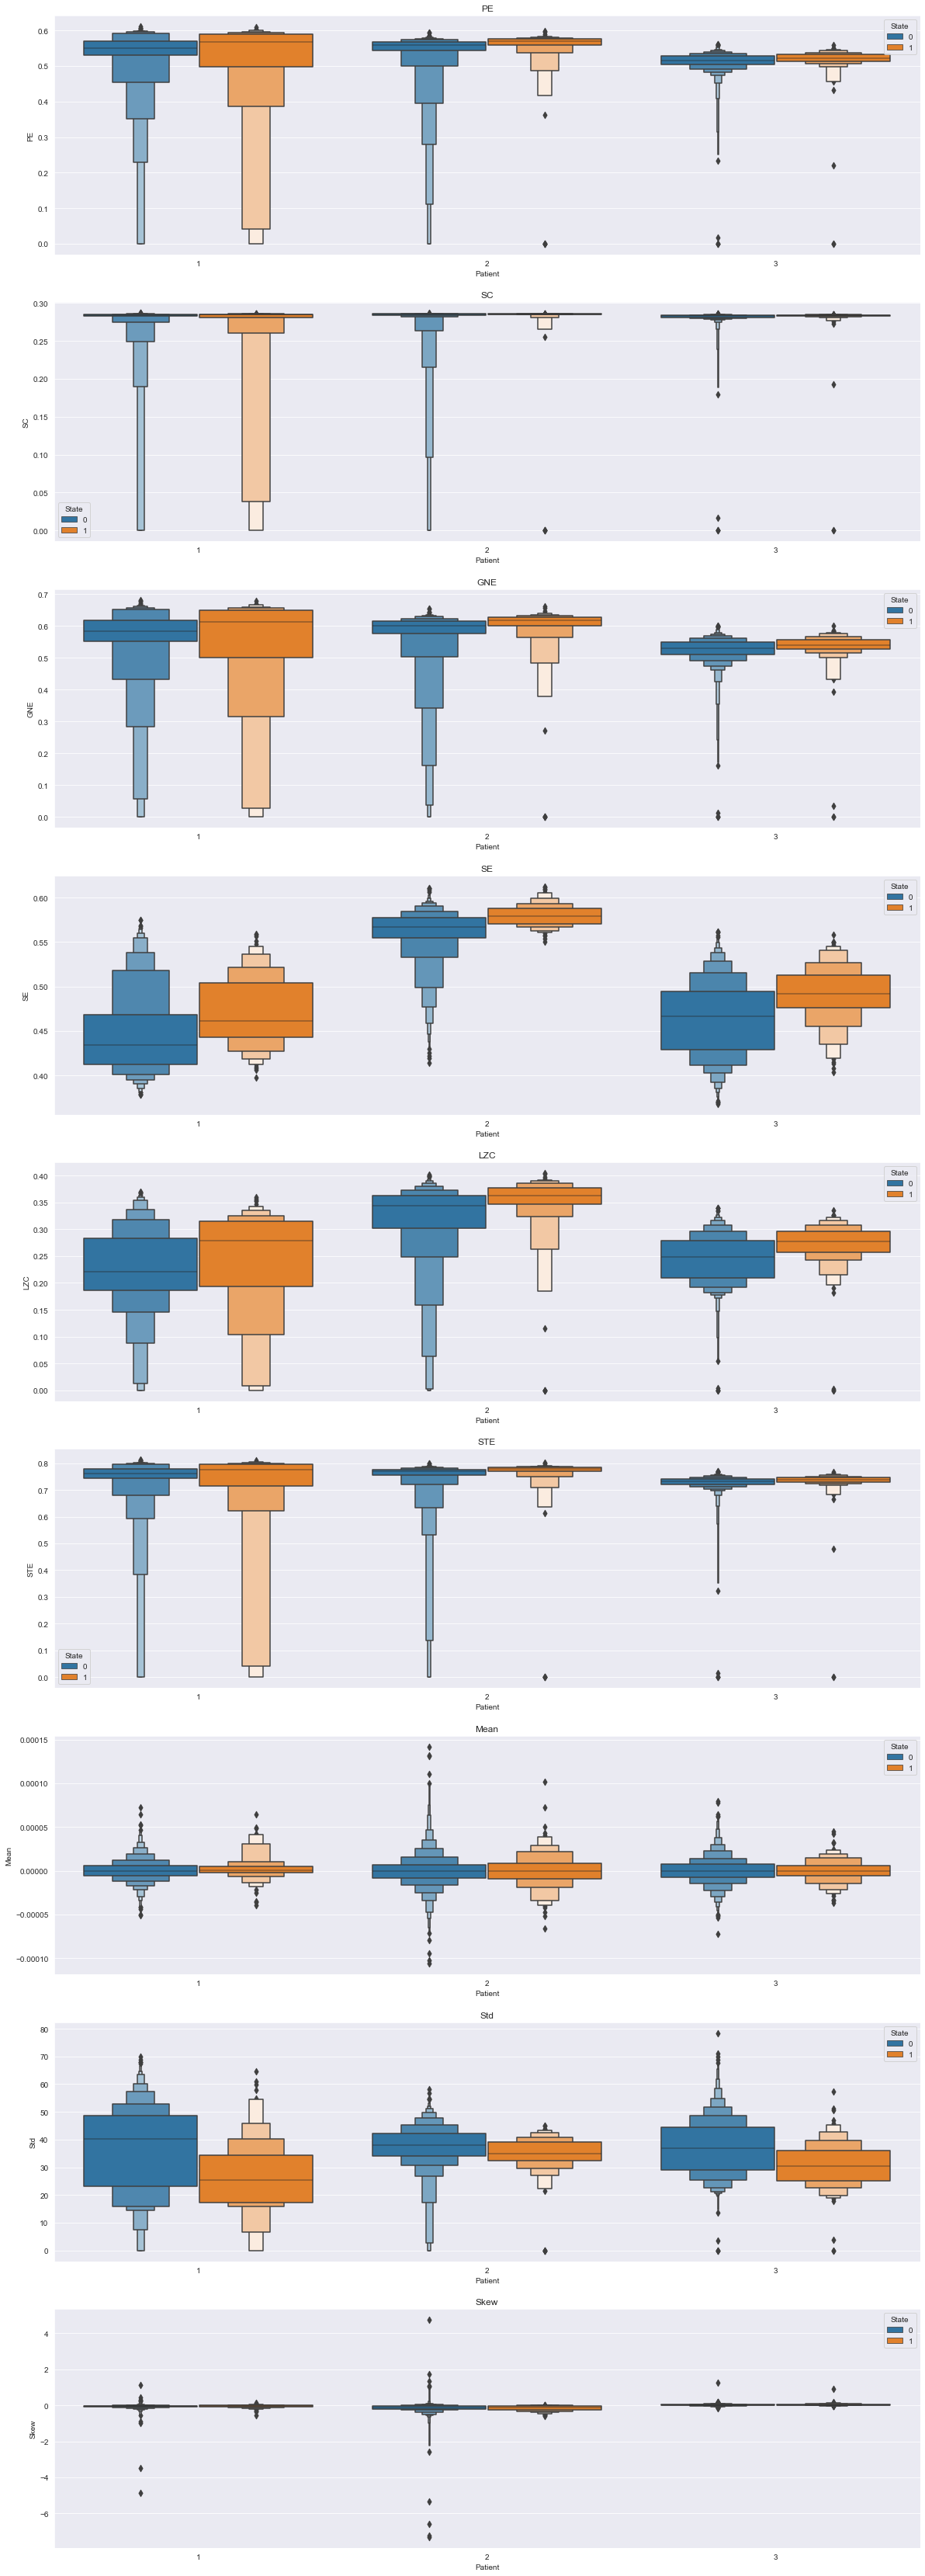

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy import linalg
from sklearn import mixture

sns.set_style("darkgrid")

# Obtenemos los datos

df_etiquetados = []
df_no_etiquetados = []
filedir = "data_preprocessed"

from os import listdir

for file in listdir(filedir):
    if file[-4:] == ".csv":
        if "noEtiquetado" in file: df_no_etiquetados.append(pd.read_csv(f"{filedir}/{file}"))
        else: df_etiquetados.append(pd.read_csv(f"{filedir}/{file}"))
    else: print(file, " ---> no es csv")

for df in df_etiquetados: assert len(df.columns) == 11
for df in df_no_etiquetados: assert len(df.columns) == 10
    
df = pd.concat(df_etiquetados)

df["State"] = df["State"].astype(int)
df["Patient"] = df["Patient"].astype(int)

metricas = df.drop(axis=1, labels=["Patient", "State"]).columns

fig, axes = plt.subplots(len(metricas), figsize=(20,60))

for i,column in enumerate(metricas):
    sns.boxenplot(ax=axes[i], data=df, y=column, x="Patient", hue='State')
    axes[i].set_title(column)

for ax in axes:
    ax.tick_params(axis='y')